<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

As the world becomes increasingly interconnected, more individuals are seeking opportunities to improve their quality of life by relocating to new destinations around the globe. The objective of this project is to identify which countries individuals should move to for better quality of life based on factors such as health, economy, and happiness.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The data used in this study originated from the World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable.

### Datasets Used

* [`hapiscore_whr.csv`](./data/hapiscore_whr.csv): Happiness Score (WHR) by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

### Outside Research

According to the World Happiness Report, 6 factors *may* influence the level of happiness a citizen experiences while living in their country. 
1. Social Support
2. Income
3. Health
4. Freedom
5. Generosity
6. Abscence of Corruption 

<blockquote>
    Since the publication of the first World Happiness Report in 2012, there is a growing consensus that happiness can be promoted through public policies and the actions of business and civil society. Moreover, happiness and well-being can be usefully measured in a number of ways, including through surveys of people’s satisfaction with their lives. <br><br>
    

The World Happiness Report research leverages six key factors to help explain variation in self-reported levels of happiness across the world: social support, income, health, freedom, generosity, and absence of corruption. Governments are increasingly using this analysis to orient policies towards happiness.
</blockquote>

Source: “Happiest Countries Prove Resilient Despite Overlapping Crises.” The World Happiness Report, 20 March 2023, https://worldhappiness.report/news/happiest-countries-prove-resilient-despite-overlapping-crises/.

Based on this information, this study will focus on analyzing the impact of income and health on the well-being of the citizens in a country.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [10]:
# Code:
def find_mean(num_list):
    return sum(num_list) / len(num_list)

In [11]:
# Calculate Mean Example
list_1 = [1, 3, 5, 7, 9]
find_mean(list_1)

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [17]:
# Code:
def find_std(num_list):
    mean = find_mean(num_list)
    return find_mean([(num - mean) ** 2 for num in num_list]) ** 0.5

In [18]:
# Calculate Standard Deviation Example
find_std(list_1)

2.8284271247461903

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [19]:
# Code:
import numpy as np
import pandas as pd

def data_cleaning(data):
    abrev = {'k': 10 ** 3,
           'm' : 10 ** 6,
           'b' : 10 ** 9,
           't' : 10 ** 12}
    
    if pd.isnull(data):
        return np.nan
    
    elif data[-1].isalpha():
        try:
            return int(float(data[:-1]) * abrev.get(data[-1].lower()))
        except:
            return np.nan
    else:
        try:
            return int(round(float(data), 0))
        except:
            return np.nan


In [20]:
data_cleaning("5.5")

6

In [21]:
data_cleaning("5.5k")

5500

In [22]:
data_cleaning("5.5K")

5500

In [23]:
data_cleaning("5B")

5000000000

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [24]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Import Data

In [25]:
# Import datasets:
life_exp = pd.read_csv("./../data/life_expectancy.csv")
gni =  pd.read_csv("./../data/gni_per_cap_atlas_method_con2021.csv")
happiness = pd.read_csv("./../data/hapiscore_whr.csv")

In [26]:
# Create filters for life expectancy and gni datasets for years 2005-2022 since happiness score dataset only has data for 2005-2022.
start_year = 2005
end_year = 2022
life_exp_filter = life_exp.loc[:,['country'] + [str(year) for year in range(start_year, end_year + 1)]]
gni_filter = gni.loc[:,['country'] + [str(year) for year in range(start_year, end_year + 1)]]

### Display Data (Top 5 Rows)

#### No Filter

In [27]:
# Display Life Exp Data
life_exp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [28]:
# Display GNI Data
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [29]:
# Display Happiness Data
happiness.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8
3,UAE,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2


#### Filtering from 2005 to 2022 (Consistent Timeframe Across All 3 Datasets)

In [30]:
# Display Life Exp Data
life_exp_filter.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,57.6,58.0,58.5,59.2,59.9,60.5,61.0,61.4,61.9,61.9,61.9,62.0,62.9,62.7,63.3,63.4,64.0,64.3
1,Angola,56.4,57.0,58.0,58.8,59.5,60.2,60.8,61.4,62.1,63.0,63.5,63.9,64.2,64.6,65.1,65.2,65.8,66.1
2,Albania,76.2,76.9,77.5,77.6,78.0,78.1,78.1,78.2,78.3,78.2,78.1,78.2,78.3,78.4,78.5,77.9,78.7,78.8
3,Andorra,81.4,81.5,81.7,81.8,81.8,81.8,81.9,81.9,82.0,82.0,82.0,82.1,82.1,82.1,82.2,NaN,NaN,NaN
4,United Arab Emirates,69.2,69.5,70.0,70.4,70.6,70.8,71.0,71.2,71.6,73.0,73.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3


In [31]:
# Display GNI Data
gni_filter.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,395,404,449,456,541,607,617,714,728,695,655,611,578,531,530,500,508,519
1,Angola,1740,2250,3050,3670,3810,3840,3970,4730,5360,5530,5020,4190,3760,3340,3030,2140,2090,2070
2,Albania,3320,3800,4290,4890,5140,5190,5130,4940,5090,5010,4880,4800,4680,5060,5330,5210,5480,5710
3,United Arab Emirates,47.5k,49k,49.1k,48.3k,42k,39.7k,40.8k,44.4k,48k,49k,47.6k,45.1k,42.8k,43.2k,44.7k,39.4k,39.4k,39.2k
4,Argentina,5400,6820,8070,9290,9360,11k,12.5k,13.5k,14.4k,13.6k,14k,13.6k,14.3k,12.9k,11.5k,9070,9500,9640


In [32]:
# Display Happiness Data
happiness.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8
3,UAE,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2


### Check for Missing Values

#### No Filter

In [33]:
# Missing Values for Life Exp
life_exp.isnull().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [34]:
# Missing Values for GNI
gni.isnull().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [35]:
# Missing Values for Happiness
happiness.isnull().sum()

country      0
2005       136
2006        74
2007        62
2008        54
2009        51
2010        41
2011        19
2012        24
2013        28
2014        20
2015        22
2016        23
2017        17
2018        23
2019        21
2020        48
2021        42
2022        27
dtype: int64

#### Filtering from 2005 to 2022 (Consistent Timeframe Across All 3 Datasets)

In [36]:
# Missing Values for Life Exp
life_exp_filter.isnull().sum()

country    0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       9
2021       9
2022       9
dtype: int64

In [37]:
# Missing Values for GNI
gni_filter.isnull().sum()

country    0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       1
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
2018       1
2019       1
2020       1
2021       1
2022       1
dtype: int64

In [38]:
# Missing Values for Happiness
happiness.isnull().sum()

country      0
2005       136
2006        74
2007        62
2008        54
2009        51
2010        41
2011        19
2012        24
2013        28
2014        20
2015        22
2016        23
2017        17
2018        23
2019        21
2020        48
2021        42
2022        27
dtype: int64

### Fix Missing Values

#### GNI Missing Values Handling

In [39]:
# Check to see which rows in GNI dataset have missing values in them
gni[gni.isnull().any(axis = 1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
100,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Since there is only 1 row with missing data and it is missing data throughout several years, 
# I will drop it from the dataset and save new dataset to new variable in case I need to reference original dataset in the future. 
gni_drop = gni.drop(100)

In [41]:
# Double checking to see that there are no more rows with missing values
gni_drop[gni_drop.isnull().any(axis = 1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050


In [42]:
# Double check to see that row has been dropped by checking the number of entries from original and new dataset
gni_drop.shape

(190, 252)

In [43]:
gni.shape

(191, 252)

#### Life Exp Missing Values Handling

In [44]:
# Check to see which rows in Life exp dataset have missing values in them
life_exp[life_exp.isnull().any(axis = 1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Grab the indexes of all of the countries with missing values and put them in a list 
life_exp[life_exp.isnull().any(axis = 1)].index.tolist()

[3, 46, 93, 107, 112, 131, 138, 156, 178]

In [47]:
# Save list of indexes to a variable
life_drop_list = life_exp[life_exp.isnull().any(axis = 1)].index.tolist()

In [66]:
# Since there is only 9 rows with missing data and it is missing data throughout several years, 
# I will drop it from the dataset and save new dataset to new variable in case I need to reference original dataset in the future. 
life_exp_drop = life_exp.drop(life_drop_list)

In [67]:
# Double checking to see that there are no more rows with missing values
life_exp_drop[life_exp_drop.isnull().any(axis = 1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


In [68]:
# Double check to see that row has been dropped by checking the number of entries from original and new dataset
life_exp.shape

(195, 302)

In [69]:
life_exp_drop.shape

(186, 302)

#### Happiness Missing Values Handling

In [52]:
# Check to see which rows in happiness dataset have missing values in them
# Since there are a significant amount of missing data across several rows, I will handle the missing data differently than the previous datasets so that I do not lose a significant amount of data
# I will select specific years that have minimal missing data later on to overcome this problem (see section )
happiness[happiness.isnull().any(axis = 1)]

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8
3,UAE,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Vietnam,NaN,52.9,54.2,54.8,53.0,53.0,57.7,55.4,50.2,50.9,50.8,50.6,51.8,53.0,54.7,54.6,55.4,57.6
159,Yemen,NaN,NaN,44.8,NaN,48.1,43.5,37.5,40.6,42.2,39.7,29.8,38.3,32.5,30.6,42.0,NaN,NaN,NaN
160,South Africa,NaN,50.8,52.0,53.5,52.2,46.5,49.3,51.3,36.6,48.3,48.9,47.7,45.1,48.8,50.4,49.5,56.0,52.8
161,Zambia,NaN,48.2,40.0,47.3,52.6,NaN,50.0,50.1,52.4,43.5,48.4,43.5,39.3,40.4,33.1,48.4,30.8,39.8


### Display the data types of each feature

In [53]:
# Check datatypes for life exp data
life_exp.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [54]:
# Check sum of all datatypes for life exp data
life_exp.dtypes.value_counts()

float64    301
object       1
Name: count, dtype: int64

In [55]:
# Check datatypes for GNI data
gni.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

In [56]:
# Check sum of all datatypes for GNI data
gni.dtypes.value_counts()

object     155
float64     97
Name: count, dtype: int64

In [57]:
# Check datatypes for happiness data
happiness.dtypes

country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
dtype: object

In [58]:
# Check sum of all datatypes for happiness data
happiness.dtypes.value_counts()

float64    18
object      1
Name: count, dtype: int64

### Fix any incorrect data types 

#### Convert GNI Data to Int Datatype

In [59]:
# Change all datatypes in GNI to string so that I can use my data conversion function that I had previously made (does not work on other datatypes otherwise)
gni_drop = gni_drop.astype('string')

In [60]:
# Check to see that the datatypes have been changed to strings
gni_drop.dtypes.value_counts()

string    252
Name: count, dtype: int64

In [61]:
# Save dataset to new variable before making changes in case I would like to access previous version in the future
gni_convert = gni_drop

In [62]:
# Run data conversion function on all elements in dataset that should be integers except 'country' column 
gni_convert.iloc[:,1:] = gni_drop.iloc[:,1:].map(data_cleaning)

In [63]:
# Show that elements have been converted correctly
gni_convert.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207,207,207,207,207,207,207,207,207,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517,519,522,524,525,528,531,533,536,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207,207,207,207,207,207,207,207,207,...,9610,9820,10000,10200,10500,10700,10900,11100,11400,11600
3,United Arab Emirates,738,740,743,746,749,751,754,757,760,...,47900,48900,50000,51000,52100,53200,54300,55500,56700,57900
4,Argentina,794,797,799,802,805,808,810,813,816,...,12800,13100,13400,13600,13900,14200,14500,14800,15200,15500


In [64]:
# See if correct columns have been converted to integer datatype
gni_convert.dtypes.value_counts()

int64     251
string      1
Name: count, dtype: int64

### Filter Out and Rename Columns That Will Be Used
Will be focusing on data from 2012 and 2022. I chose 2022 since that is the most recent year that all 3 datasets have data for which will be best for answering my problem statement. I chose 2012 since it is a decade from 2022 and it will allow me to analyze any changes over the years and make comparisions. I also chose these two years since they have minimal missing data compared to other years.

#### Life Expectancy

In [70]:
# Filter data to 2012 and 2022
life_exp_final = life_exp_drop.loc[:, ['country', '2012', '2022']]

In [71]:
# Rename columns
life_exp_final = life_exp_final.rename(columns= {"2012": "2012_life", "2022": "2022_life"})

In [72]:
# Visualize Results
life_exp_final

,country,2012_life,2022_life
0,Afghanistan,61.4,64.3
1,Angola,61.4,66.1
2,Albania,78.2,78.8
4,United Arab Emirates,71.2,74.3
5,Argentina,76.2,77.0
...,...,...,...
190,Samoa,69.6,70.8
191,Yemen,67.9,68.0
192,South Africa,60.1,65.9
193,Zambia,58.5,64.0


#### GNI

In [73]:
# Filter data to 2012 and 2022
gni_final = gni_convert.loc[:, ['country', "2012", "2022"]]

In [74]:
# Rename columns
gni_final = gni_final.rename(columns= {"2012": "2012_gni", "2022": "2022_gni"})

In [75]:
# Visualize Results
gni_final

,country,2012_gni,2022_gni
0,Afghanistan,714,519
1,Angola,4730,2070
2,Albania,4940,5710
3,United Arab Emirates,44400,39200
4,Argentina,13500,9640
...,...,...,...
186,Samoa,4150,3730
187,Yemen,1430,856
188,South Africa,9490,6130
189,Zambia,1920,1110


#### Happiness

In [76]:
# Filter data to 2012 and 2022
happiness_final = happiness.loc[:, ['country', "2012", "2022"]]

In [77]:
# Rename columns
happiness_final = happiness_final.rename(columns= {"2012": "2012_happiness", "2022": "2022_happiness"})

In [78]:
# Visualize Results
happiness_final

,country,2012_happiness,2022_happiness
0,Afghanistan,37.8,18.6
1,Angola,43.6,NaN
2,Albania,55.1,52.8
3,UAE,72.2,65.7
4,Argentina,64.7,60.2
...,...,...,...
158,Vietnam,55.4,57.6
159,Yemen,40.6,NaN
160,South Africa,51.3,52.8
161,Zambia,50.1,39.8


### Perform additional cleaning on filtered happiness data

In [79]:
# Check to see which rows in filtered happiness dataset have missing values in them
happiness_final[happiness_final.isnull().any(axis = 1)]

,country,2012_happiness,2022_happiness
1,Angola,43.6,NaN
8,Azerbaijan,49.1,NaN
9,Burundi,NaN,NaN
17,Belarus,57.5,NaN
18,Belize,NaN,NaN
21,Bhutan,NaN,NaN
23,Central African Republic,NaN,NaN
28,Cote d'Ivoire,NaN,50.5
35,Cuba,NaN,NaN
39,Djibouti,NaN,NaN


In [80]:
# Grab the indexes of all of the countries with missing values and put them in a list
happiness_drop_list = happiness_final[happiness_final.isnull().any(axis = 1)].index.tolist()

In [81]:
# I will drop them from the dataset and save new dataset to new variable in case I need to reference original dataset in the future.
happiness_use = happiness_final.drop(happiness_drop_list)

In [82]:
# Double check to see that rows have been dropped by checking the number of entries from original and new dataset
happiness_final.shape

(163, 3)

In [83]:
happiness_use.shape

(126, 3)

### Merge dataframes that can be merged

In [84]:
# merge filtered life exp and gni data together
merged_data = pd.merge(life_exp_final, gni_final)

In [85]:
# Visualize
merged_data

,country,2012_life,2022_life,2012_gni,2022_gni
0,Afghanistan,61.4,64.3,714,519
1,Angola,61.4,66.1,4730,2070
2,Albania,78.2,78.8,4940,5710
3,United Arab Emirates,71.2,74.3,44400,39200
4,Argentina,76.2,77.0,13500,9640
...,...,...,...,...,...
179,Samoa,69.6,70.8,4150,3730
180,Yemen,67.9,68.0,1430,856
181,South Africa,60.1,65.9,9490,6130
182,Zambia,58.5,64.0,1920,1110


In [86]:
# merge previously combined data with happiness data
merged_data = pd.merge(merged_data, happiness_use)

In [87]:
# Visualize
merged_data

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
0,Afghanistan,61.4,64.3,714,519,37.8,18.6
1,Albania,78.2,78.8,4940,5710,55.1,52.8
2,Argentina,76.2,77.0,13500,9640,64.7,60.2
3,Armenia,74.6,76.1,4400,4410,43.2,53.4
4,Australia,82.6,83.3,68300,57100,72.0,71.0
...,...,...,...,...,...,...,...
117,Venezuela,75.2,75.3,14400,3180,70.7,52.1
118,Vietnam,73.5,74.8,1750,2970,55.4,57.6
119,South Africa,60.1,65.9,9490,6130,51.3,52.8
120,Zambia,58.5,64.0,1920,1110,50.1,39.8


### Save cleaned and merged dataframes as csv files

In [358]:
life_exp_final.to_csv("./../data/final_expectancy.csv", index = False)

In [359]:
gni_final.to_csv("./../data/final_gni.csv", index = False)

In [360]:
happiness_use.to_csv("./../data/final_hapiscore_whr.csv", index = False)

In [361]:
merged_data.to_csv("./../data/final_merged_data.csv", index = False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.



|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|final_merged_data.csv|Name of country being studied
|2012_life|float|life_expectancy.csv|Number of years a person is expected to live in a particular country in 2012
|2022_life|float|life_expectancy.csv|Number of years a person is expected to live in a particular country in 2022
|2012_gni|int|gni_per_cap_atlas_method_con2021.csv|Gross National Income per capita (USD) in 2012
|2022_gni|int|gni_per_cap_atlas_method_con2021.csv|Gross National Income per capita (USD) in 2022
|2012_happiness|float|hapiscore_whr.csv|National average happiness score in 2012
|2022_happiness|float|hapiscore_whr.csv|National average happiness score in 2022


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Summary Statistics

In [89]:
merged_data.describe()

,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,72.748361,75.043443,16549.237705,15745.778689,54.486885,55.518852
std,7.475516,6.338104,22495.014107,20477.767918,11.126500,11.365566
min,56.000000,61.300000,431.000000,485.000000,31.900000,18.600000
25%,67.925000,70.200000,1937.500000,2270.000000,46.175000,48.575000
50%,74.550000,76.050000,6630.000000,6160.000000,52.150000,56.700000
75%,78.525000,80.600000,19850.000000,20550.000000,61.500000,62.900000
max,83.600000,85.200000,112000.000000,85800.000000,77.800000,78.000000


### Standard Deviation Calculation

In [90]:
# made a few adjustments to original functions to accommadate for dataframes
def find_mean(num_list):
    return num_list.sum() / len(num_list)

In [91]:
def find_std(num_list):
    mean = find_mean(num_list)
    temp_list = [(num - mean) ** 2 for num in num_list]
    return (sum(temp_list) / len(temp_list)) ** 0.5

In [92]:
sd = {col : find_std(merged_data[col]) for col in merged_data.iloc[:,1:].columns}

In [93]:
sd

{'2012_life': 7.444815927730939,
 '2022_life': 6.312075179081758,
 '2012_gni': 22402.63172847175,
 '2022_gni': 20393.66995269723,
 '2012_happiness': 11.08080566713148,
 '2022_happiness': 11.318889854380984}

### EDA

**Which countries have highest happiness ratings in 2012?**

In [95]:
merged_data.sort_values('2012_happiness', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
87,Norway,81.6,83.4,112000,83600,76.8,73.2
54,Iceland,82.9,84.5,46100,65000,75.9,75.3
106,Sweden,82.1,83.3,67000,55600,75.6,74.0
29,Denmark,80.3,81.5,69900,66200,75.2,75.9
86,Netherlands,81.2,82.2,60000,54100,74.7,74.0
37,Finland,80.9,82.4,55500,52100,74.2,78.0
16,Canada,82.0,82.6,57900,47000,74.2,69.6
5,Austria,81.2,82.6,56700,51500,74.0,71.0
73,Mexico,75.7,75.9,11400,9010,73.2,63.3


Answer: *Switzerland, Norway, Iceland, Sweden, Denmark, Netherlands, Finland, Canada, Austria, Mexico*

**Which countries have highest happiness ratings in 2022?**

In [100]:
merged_data.sort_values('2022_happiness', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
37,Finland,80.9,82.4,55500,52100,74.2,78.0
29,Denmark,80.3,81.5,69900,66200,75.2,75.9
54,Iceland,82.9,84.5,46100,65000,75.9,75.3
55,Israel,82.3,83.5,36900,45000,71.1,74.7
86,Netherlands,81.2,82.2,60000,54100,74.7,74.0
106,Sweden,82.1,83.3,67000,55600,75.6,74.0
87,Norway,81.6,83.4,112000,83600,76.8,73.2
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
68,Luxembourg,81.5,83.4,99600,84000,69.6,72.3
89,New Zealand,81.2,82.2,41600,43800,72.5,71.2


Answer: *Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, New Zealand*

**Which countries have lowest happiness ratings in 2012?**

In [101]:
merged_data.sort_values('2012_happiness', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
7,Benin,61.7,65.5,1270,1350,31.9,43.7
72,Madagascar,63.2,66.5,567,485,35.5,40.2
42,Guinea,58.2,62.2,793,1080,36.5,50.7
101,Senegal,66.2,69.3,1500,1510,36.7,48.5
0,Afghanistan,61.4,64.3,714,519,37.8,18.6
83,Niger,59.6,63.6,623,615,38.0,45.0
62,Cambodia,67.9,70.5,997,1620,39.0,43.9
22,"Congo, Rep.",61.9,66.1,3970,1710,39.2,52.7
8,Burkina Faso,58.6,62.9,827,797,39.5,46.4
24,Comoros,66.3,69.4,1610,1360,39.6,35.5


Answer: *Benin, Madagascar, Guinea, Senegal, Afghanistan, Niger, Cambodia, Congo, Rep., Burkina Faso, Comoros*

**Which countries have lowest happiness ratings in 2022?**

In [102]:
merged_data.sort_values('2022_happiness', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
0,Afghanistan,61.4,64.3,714,519,37.8,18.6
65,Lebanon,75.7,76.9,8570,4720,45.7,23.9
121,Zimbabwe,56.0,61.7,1430,1170,49.5,32.0
21,"Congo, Dem. Rep.",60.1,65.9,431,561,46.4,32.1
15,Botswana,58.6,62.6,8220,7220,48.4,34.4
81,Malawi,59.3,66.0,521,597,42.8,35.0
24,Comoros,66.3,69.4,1610,1360,39.6,35.5
112,Tanzania,62.7,68.1,918,1090,40.1,36.9
120,Zambia,58.5,64.0,1920,1110,50.1,39.8
72,Madagascar,63.2,66.5,567,485,35.5,40.2


Answer: *Afghanistan, Lebanon, Zimbabwe, Congo, Dem. Rep., Botswana, Malawi, Comoros, Tanzania, Zambia, Madagascar*

**Which countries have highest life exp in 2012?**

In [103]:
merged_data.sort_values('2012_life', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
58,Japan,83.6,85.2,56100,43100,59.7,61.3
45,"Hong Kong, China",83.2,84.8,41200,52000,54.8,53.1
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
54,Iceland,82.9,84.5,46100,65000,75.9,75.3
4,Australia,82.6,83.3,68300,57100,72.0,71.0
34,Spain,82.4,83.5,33500,30300,62.9,64.4
56,Italy,82.4,83.5,41000,34900,58.4,64.0
55,Israel,82.3,83.5,36900,45000,71.1,74.7
106,Sweden,82.1,83.3,67000,55600,75.6,74.0
16,Canada,82.0,82.6,57900,47000,74.2,69.6


Answer: *Japan, China, Switzerland, Iceland, Australia, Spain, Italy, Israel, Sweden, Canada*

**Which countries have highest life exp in 2012?**

In [104]:
merged_data.sort_values('2022_life', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
58,Japan,83.6,85.2,56100,43100,59.7,61.3
45,"Hong Kong, China",83.2,84.8,41200,52000,54.8,53.1
54,Iceland,82.9,84.5,46100,65000,75.9,75.3
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
34,Spain,82.4,83.5,33500,30300,62.9,64.4
55,Israel,82.3,83.5,36900,45000,71.1,74.7
56,Italy,82.4,83.5,41000,34900,58.4,64.0
87,Norway,81.6,83.4,112000,83600,76.8,73.2
68,Luxembourg,81.5,83.4,99600,84000,69.6,72.3
4,Australia,82.6,83.3,68300,57100,72.0,71.0


Answer: *Japan, China, Iceland, Switzerland, Spain, Israel, Italy, Norway, Luxembourg, Australia*

**Which countries have lowest life exp in 2012?**

In [105]:
merged_data.sort_values('2012_life', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
121,Zimbabwe,56.0,61.7,1430,1170,49.5,32.0
107,Chad,57.3,61.3,1090,620,40.3,44.0
42,Guinea,58.2,62.2,793,1080,36.5,50.7
120,Zambia,58.5,64.0,1920,1110,50.1,39.8
8,Burkina Faso,58.6,62.9,827,797,39.5,46.4
15,Botswana,58.6,62.6,8220,7220,48.4,34.4
20,Cameroon,58.8,64.3,1610,1560,42.5,49.7
75,Mali,59.1,63.0,827,863,43.1,42.0
81,Malawi,59.3,66.0,521,597,42.8,35.0
83,Niger,59.6,63.6,623,615,38.0,45.0


Answer: *Zimbabwe, Chad, Guinea, Zambia, Burkina Faso, Botswana, Cameroon, Mali, Malawi, Niger*

**Which countries have lowest life exp in 2022?**

In [106]:
merged_data.sort_values('2022_life', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
107,Chad,57.3,61.3,1090,620,40.3,44.0
121,Zimbabwe,56.0,61.7,1430,1170,49.5,32.0
42,Guinea,58.2,62.2,793,1080,36.5,50.7
15,Botswana,58.6,62.6,8220,7220,48.4,34.4
8,Burkina Faso,58.6,62.9,827,797,39.5,46.4
75,Mali,59.1,63.0,827,863,43.1,42.0
83,Niger,59.6,63.6,623,615,38.0,45.0
120,Zambia,58.5,64.0,1920,1110,50.1,39.8
20,Cameroon,58.8,64.3,1610,1560,42.5,49.7
0,Afghanistan,61.4,64.3,714,519,37.8,18.6


Answer: *Chad, Zimbabwe, Guinea, Botswana, Burkina Faso, Mali, Niger, Zambia, Cameroon, Afghanistan*

**Which countries have highest gni in 2012?**

In [107]:
merged_data.sort_values('2012_gni', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
87,Norway,81.6,83.4,112000,83600,76.8,73.2
68,Luxembourg,81.5,83.4,99600,84000,69.6,72.3
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
29,Denmark,80.3,81.5,69900,66200,75.2,75.9
4,Australia,82.6,83.3,68300,57100,72.0,71.0
106,Sweden,82.1,83.3,67000,55600,75.6,74.0
86,Netherlands,81.2,82.2,60000,54100,74.7,74.0
16,Canada,82.0,82.6,57900,47000,74.2,69.6
5,Austria,81.2,82.6,56700,51500,74.0,71.0
58,Japan,83.6,85.2,56100,43100,59.7,61.3


Answer: *Norway, Luxembourg, Switzerland, Denmark, Australia, Sweden, Netherlands, Canada, Austria, Japan*

**Which countries have highest gni in 2022?**

In [108]:
merged_data.sort_values('2022_gni', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4
68,Luxembourg,81.5,83.4,99600,84000,69.6,72.3
87,Norway,81.6,83.4,112000,83600,76.8,73.2
51,Ireland,81.0,82.5,46100,70400,69.7,69.1
29,Denmark,80.3,81.5,69900,66200,75.2,75.9
54,Iceland,82.9,84.5,46100,65000,75.9,75.3
4,Australia,82.6,83.3,68300,57100,72.0,71.0
106,Sweden,82.1,83.3,67000,55600,75.6,74.0
86,Netherlands,81.2,82.2,60000,54100,74.7,74.0
37,Finland,80.9,82.4,55500,52100,74.2,78.0


Answer: Switzerland, Luxembourg, Norway, Ireland, Denmark, Iceland, Australia, Sweden, Netherlands, Finland

**Which countries have lowest gni in 2012?**

In [109]:
merged_data.sort_values('2012_gni', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
21,"Congo, Dem. Rep.",60.1,65.9,431,561,46.4,32.1
36,Ethiopia,64.9,69.9,465,956,45.6,40.9
81,Malawi,59.3,66.0,521,597,42.8,35.0
72,Madagascar,63.2,66.5,567,485,35.5,40.2
83,Niger,59.6,63.6,623,615,38.0,45.0
0,Afghanistan,61.4,64.3,714,519,37.8,18.6
42,Guinea,58.2,62.2,793,1080,36.5,50.7
75,Mali,59.1,63.0,827,863,43.1,42.0
8,Burkina Faso,58.6,62.9,827,797,39.5,46.4
88,Nepal,69.5,71.9,873,1240,42.3,53.6


Answer: Congo, Dem. Rep., Ethiopia, Malawi, Madagascar, Niger, Afghanistan, Guinea, Mali, Burkina Faso, Nepal

**Which countries have lowest gni in 2022?**

In [110]:
merged_data.sort_values('2022_gni', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness
72,Madagascar,63.2,66.5,567,485,35.5,40.2
0,Afghanistan,61.4,64.3,714,519,37.8,18.6
21,"Congo, Dem. Rep.",60.1,65.9,431,561,46.4,32.1
81,Malawi,59.3,66.0,521,597,42.8,35.0
83,Niger,59.6,63.6,623,615,38.0,45.0
107,Chad,57.3,61.3,1090,620,40.3,44.0
8,Burkina Faso,58.6,62.9,827,797,39.5,46.4
113,Uganda,61.4,67.2,941,842,43.1,44.3
75,Mali,59.1,63.0,827,863,43.1,42.0
36,Ethiopia,64.9,69.9,465,956,45.6,40.9


Answer: Madagascar, Afghanistan, Congo, Dem. Rep., Malawi, Niger, Chad, Burkina Faso, Uganda, Mali, Ethiopia

**Which countries have highest happiness growth over a decade?**

In [111]:
merged_data["happiness_growth"] = merged_data["2022_happiness"] - merged_data["2012_happiness"]

In [112]:
merged_data.sort_values('happiness_growth', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth
42,Guinea,58.2,62.2,793,1080,36.5,50.7,14.2
46,Honduras,69.3,72.6,2210,2270,46.0,60.2,14.2
98,Romania,74.7,75.9,9930,14000,51.7,65.9,14.2
48,Hungary,75.4,77.0,14800,17600,46.8,60.4,13.6
22,"Congo, Rep.",61.9,66.1,3970,1710,39.2,52.7,13.5
10,Bulgaria,73.0,73.7,8490,10600,42.2,54.7,12.5
7,Benin,61.7,65.5,1270,1350,31.9,43.7,11.8
101,Senegal,66.2,69.3,1500,1510,36.7,48.5,11.8
11,Bahrain,75.7,77.4,24900,20400,50.3,61.7,11.4
88,Nepal,69.5,71.9,873,1240,42.3,53.6,11.3


Answer: Guinea, Honduras, Romania, Hungary, Congo, Rep., Bulgaria, Benin, Senegal, Bahrain, Nepal

**Which countries have highest economic growth over a decade?**

In [113]:
merged_data["economic_growth"] = merged_data["2022_gni"] - merged_data["2012_gni"]

In [114]:
merged_data.sort_values('economic_growth', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth,economic_growth
51,Ireland,81.0,82.5,46100,70400,69.7,69.1,-0.6,24300
54,Iceland,82.9,84.5,46100,65000,75.9,75.3,-0.6,18900
45,"Hong Kong, China",83.2,84.8,41200,52000,54.8,53.1,-1.7,10800
55,Israel,82.3,83.5,36900,45000,71.1,74.7,3.6,8100
63,South Korea,81.5,83.3,29100,35100,60.0,59.5,-0.5,6000
35,Estonia,76.5,78.5,19100,25000,53.6,64.5,10.9,5900
19,China,75.7,78.1,6700,12000,51.0,58.2,7.2,5300
67,Lithuania,74.0,76.7,16000,20900,57.7,67.6,9.9,4900
98,Romania,74.7,75.9,9930,14000,51.7,65.9,14.2,4070
69,Latvia,74.2,76.3,15600,19600,51.3,62.1,10.8,4000


Answer: Ireland, Iceland, China, Israel, South Korea, Estonia, China, Lithuania, Romania, Latvia

**Which countries have highest life exp growth over a decade?**

In [115]:
merged_data["life_growth"] = merged_data["2022_life"] - merged_data["2012_life"]

In [116]:
merged_data.sort_values('life_growth', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth,economic_growth,life_growth
81,Malawi,59.3,66.0,521,597,42.8,35.0,-7.8,76,6.7
21,"Congo, Dem. Rep.",60.1,65.9,431,561,46.4,32.1,-14.3,130,5.8
113,Uganda,61.4,67.2,941,842,43.1,44.3,1.2,-99,5.8
119,South Africa,60.1,65.9,9490,6130,51.3,52.8,1.5,-3360,5.8
121,Zimbabwe,56.0,61.7,1430,1170,49.5,32.0,-17.5,-260,5.7
20,Cameroon,58.8,64.3,1610,1560,42.5,49.7,7.2,-50,5.5
120,Zambia,58.5,64.0,1920,1110,50.1,39.8,-10.3,-810,5.5
112,Tanzania,62.7,68.1,918,1090,40.1,36.9,-3.2,172,5.4
36,Ethiopia,64.9,69.9,465,956,45.6,40.9,-4.7,491,5.0
84,Nigeria,60.7,65.5,2770,2000,54.9,49.8,-5.1,-770,4.8


Answer: Malawi, Congo, Dem. Rep., Uganda, South Africa, Zimbabwe, Cameroon, Zambia, Tanzania, Ethiopia, Nigeria

**How many countries had positive growth across all three factors over a decade?**

In [124]:
merged_data[(merged_data['happiness_growth'] > 0) & (merged_data['economic_growth'] > 0) & (merged_data['life_growth'] > 0)].head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth,economic_growth,life_growth
3,Armenia,74.6,76.1,4400,4410,43.2,53.4,10.2,10,1.5
7,Benin,61.7,65.5,1270,1350,31.9,43.7,11.8,80,3.8
10,Bulgaria,73.0,73.7,8490,10600,42.2,54.7,12.5,2110,0.7
12,Bosnia and Herzegovina,76.7,77.4,5660,6560,47.7,56.3,8.6,900,0.7
19,China,75.7,78.1,6700,12000,51.0,58.2,7.2,5300,2.4
27,Czech Republic,78.3,79.9,22000,23800,63.3,68.5,5.2,1800,1.6
30,Dominican Republic,72.9,73.7,6560,7890,47.5,55.7,8.2,1330,0.8
35,Estonia,76.5,78.5,19100,25000,53.6,64.5,10.9,5900,2.0
42,Guinea,58.2,62.2,793,1080,36.5,50.7,14.2,287,4.0
44,Guatemala,71.1,73.2,3580,4690,58.6,61.5,2.9,1110,2.1


In [122]:
merged_data[(merged_data['happiness_growth'] > 0) & (merged_data['economic_growth'] > 0) & (merged_data['life_growth'] > 0)].count()

country             36
2012_life           36
2022_life           36
2012_gni            36
2022_gni            36
2012_happiness      36
2022_happiness      36
happiness_growth    36
economic_growth     36
life_growth         36
dtype: int64

In [123]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           122 non-null    object 
 1   2012_life         122 non-null    float64
 2   2022_life         122 non-null    float64
 3   2012_gni          122 non-null    int64  
 4   2022_gni          122 non-null    int64  
 5   2012_happiness    122 non-null    float64
 6   2022_happiness    122 non-null    float64
 7   happiness_growth  122 non-null    float64
 8   economic_growth   122 non-null    int64  
 9   life_growth       122 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 9.7+ KB


Answer: 36 out of 122 countries (29.5%)

**Which countries have the highest scores across all three factors in 2022?**

In [127]:
merged_data["rank_overall"] = merged_data[["2022_happiness","2022_gni","2022_life"]].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

In [128]:
merged_data.sort_values('rank_overall', ascending= True).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth,economic_growth,life_growth,rank_overall
37,Finland,80.9,82.4,55500,52100,74.2,78.0,3.8,-3400,1.5,1
29,Denmark,80.3,81.5,69900,66200,75.2,75.9,0.7,-3700,1.2,2
54,Iceland,82.9,84.5,46100,65000,75.9,75.3,-0.6,18900,1.6,3
55,Israel,82.3,83.5,36900,45000,71.1,74.7,3.6,8100,1.2,4
106,Sweden,82.1,83.3,67000,55600,75.6,74.0,-1.6,-11400,1.2,5
86,Netherlands,81.2,82.2,60000,54100,74.7,74.0,-0.7,-5900,1.0,6
87,Norway,81.6,83.4,112000,83600,76.8,73.2,-3.6,-28400,1.8,7
17,Switzerland,83.1,84.4,99500,85800,77.8,72.4,-5.4,-13700,1.3,8
68,Luxembourg,81.5,83.4,99600,84000,69.6,72.3,2.7,-15600,1.9,9
89,New Zealand,81.2,82.2,41600,43800,72.5,71.2,-1.3,2200,1.0,10


Answer: Finland, Denmark, Iceland, Israel, Sweden, Netherlands, Norway, Switzerland, Luxembourg, New Zealand

**Which countries have the lowest scores across all three factors in 2022?**

In [133]:
merged_data.sort_values('rank_overall', ascending= False).head(10)

,country,2012_life,2022_life,2012_gni,2022_gni,2012_happiness,2022_happiness,happiness_growth,economic_growth,life_growth,rank_overall
0,Afghanistan,61.4,64.3,714,519,37.8,18.6,-19.2,-195,2.9,122
65,Lebanon,75.7,76.9,8570,4720,45.7,23.9,-21.8,-3850,1.2,121
121,Zimbabwe,56.0,61.7,1430,1170,49.5,32.0,-17.5,-260,5.7,120
21,"Congo, Dem. Rep.",60.1,65.9,431,561,46.4,32.1,-14.3,130,5.8,119
15,Botswana,58.6,62.6,8220,7220,48.4,34.4,-14.0,-1000,4.0,118
81,Malawi,59.3,66.0,521,597,42.8,35.0,-7.8,76,6.7,117
24,Comoros,66.3,69.4,1610,1360,39.6,35.5,-4.1,-250,3.1,116
112,Tanzania,62.7,68.1,918,1090,40.1,36.9,-3.2,172,5.4,115
120,Zambia,58.5,64.0,1920,1110,50.1,39.8,-10.3,-810,5.5,114
72,Madagascar,63.2,66.5,567,485,35.5,40.2,4.7,-82,3.3,113


Answer: Afghanistan, Lebanon, Zimbabwe, Congo, Dem. Rep., Botswana, Malawi, Comoros, Tanzania, Zambia, Madagascar

#### Findings and Trends

While finding the highest and lowest ranking countries for each factor (life exp, gni, and happiness), there were a few countries that consistently appeared in the top or bottom 10 across all categories. 
I found that the top ranking and bottom ranking countries border each other or are in the same regions.
The top ranking countries overall in 2022 are in the Scaninavian region.
The bottom ranking countries overall in 2022 are in Southeast Africa.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Correlations and Heatmaps

In [139]:
corr_2012 = merged_data[["2012_happiness", "2012_gni", "2012_life"]].corr()

In [140]:
corr_2012

,2012_happiness,2012_gni,2012_life
2012_happiness,1.000000,0.727227,0.727755
2012_gni,0.727227,1.000000,0.649027
2012_life,0.727755,0.649027,1.000000


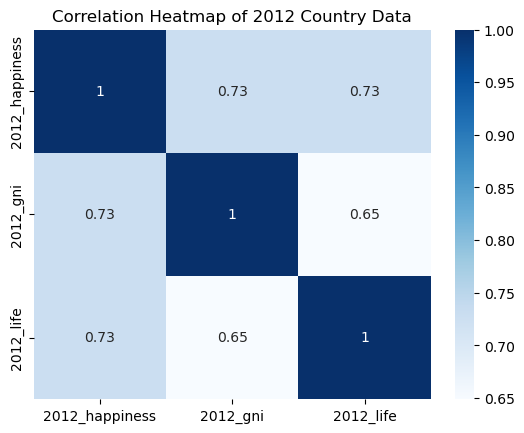

In [154]:
sns.heatmap(corr_2012, annot= True, cmap= "Blues");
plt.title("Correlation Heatmap of 2012 Country Data");

There appears to be positive correlation for happiness vs life expectancy and happiness vs gni meaning that the higher the gni and life expectancy the higher the happiness score. There is also a slightly weaker positive correlation for gni vs life expectancy meaning the higher the gni, the higher the life expectancy.

In [155]:
corr_2022 = merged_data[["2022_happiness", "2022_gni", "2022_life"]].corr()

In [156]:
corr_2022

,2022_happiness,2022_gni,2022_life
2022_happiness,1.000000,0.713725,0.733288
2022_gni,0.713725,1.000000,0.707733
2022_life,0.733288,0.707733,1.000000


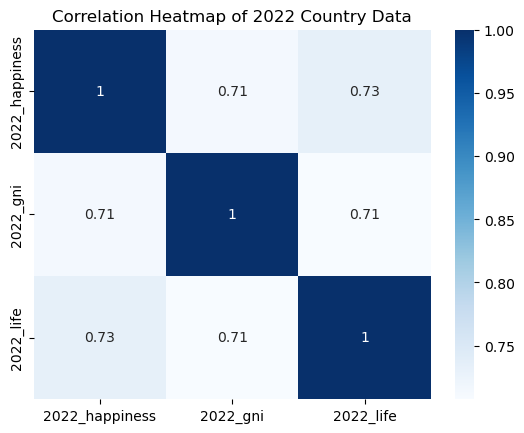

In [157]:
sns.heatmap(corr_2022, annot= True, cmap= "Blues");
plt.title("Correlation Heatmap of 2022 Country Data");

There appears to be positive correlation for happiness vs life expectancy and happiness vs gni meaning that the higher the gni and life expectancy the higher the happiness score. There is also a slightly weaker positive correlation for gni vs life expectancy meaning the higher the gni, the higher the life expectancy. There isn't a major change from the 2012 and 2022 data.

### Distribution Plots

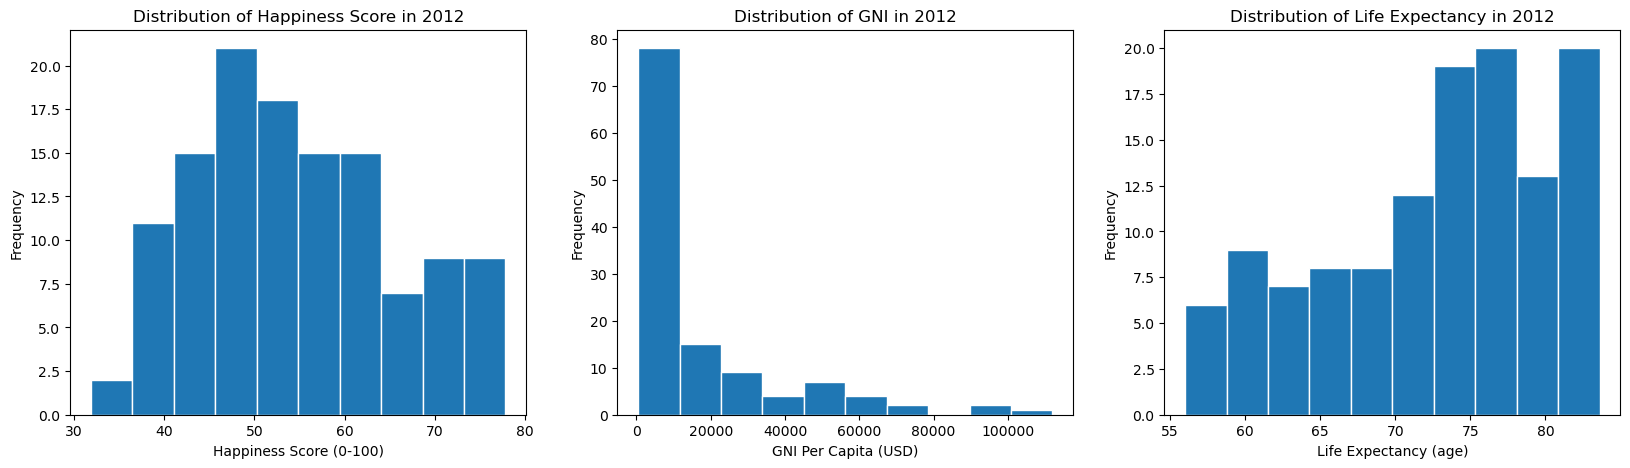

In [164]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].hist(merged_data["2012_happiness"], edgecolor= "white")
axes[0].set_title("Distribution of Happiness Score in 2012")
axes[0].set_xlabel("Happiness Score (0-100)")
axes[0].set_ylabel("Frequency")

axes[1].hist(merged_data["2012_gni"], edgecolor= "white")
axes[1].set_title("Distribution of GNI in 2012")
axes[1].set_xlabel("GNI Per Capita (USD)")
axes[1].set_ylabel("Frequency")

axes[2].hist(merged_data["2012_life"], edgecolor= "white")
axes[2].set_title("Distribution of Life Expectancy in 2012");
axes[2].set_xlabel("Life Expectancy (age)")
axes[2].set_ylabel("Frequency");

Happiness Score: The distribution appears to be somewhat normal.<br> 
GNI: The distribution is heavily skewed to the right meaning that there are a few countries that have very large GNI compared to the majority. Due to this, there are most likely a few outliers.<br> 
Life Expectancy: The distribution appears to have a slight skew to the left meaning that there are a few countries with lower life expectancies than the majority. 

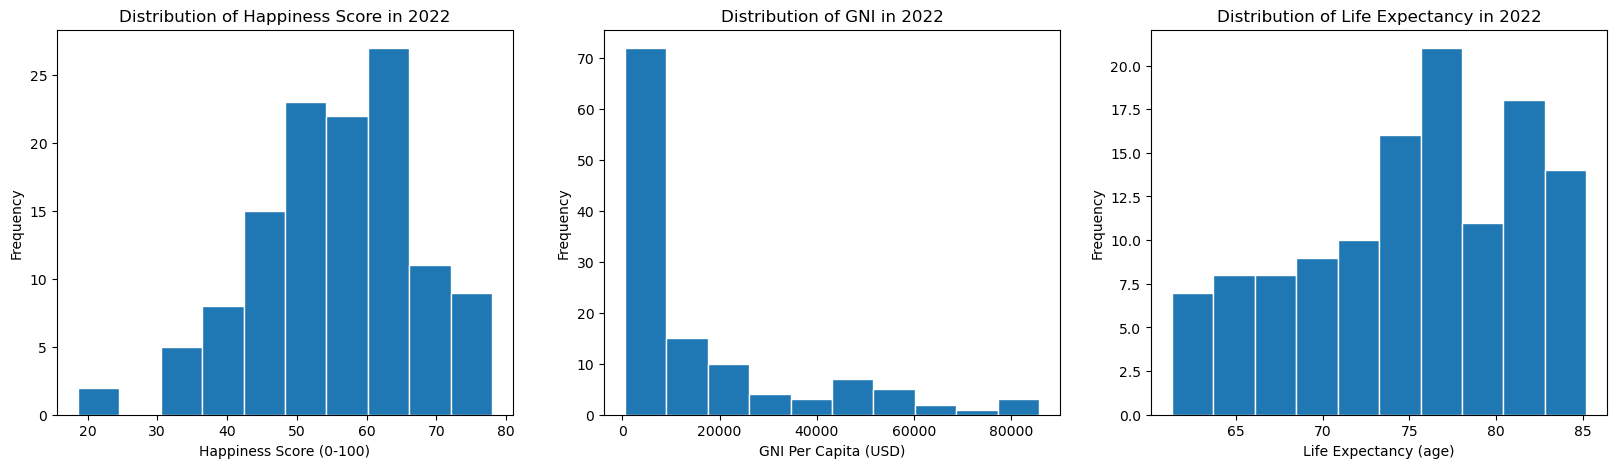

In [165]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].hist(merged_data["2022_happiness"], edgecolor= "white")
axes[0].set_title("Distribution of Happiness Score in 2022")
axes[0].set_xlabel("Happiness Score (0-100)")
axes[0].set_ylabel("Frequency")

axes[1].hist(merged_data["2022_gni"], edgecolor= "white")
axes[1].set_title("Distribution of GNI in 2022")
axes[1].set_xlabel("GNI Per Capita (USD)")
axes[1].set_ylabel("Frequency")

axes[2].hist(merged_data["2022_life"], edgecolor= "white")
axes[2].set_title("Distribution of Life Expectancy in 2022");
axes[2].set_xlabel("Life Expectancy (age)")
axes[2].set_ylabel("Frequency");

Happiness Score: The distribution appears to be slighly skewed to the left meaning that there are a few countries with lower happiness scores than the majority.<br> 
GNI: The distribution is heavily skewed to the right meaning that there are a few countries that have very large GNI compared to the majority. Due to this, there are most likely a few outliers.<br> 
Life Expectancy: Ther distribution appears to have a slight skew to the left meaning that there are a few countries with lower life expectancies than the majority. 

### Box Plots

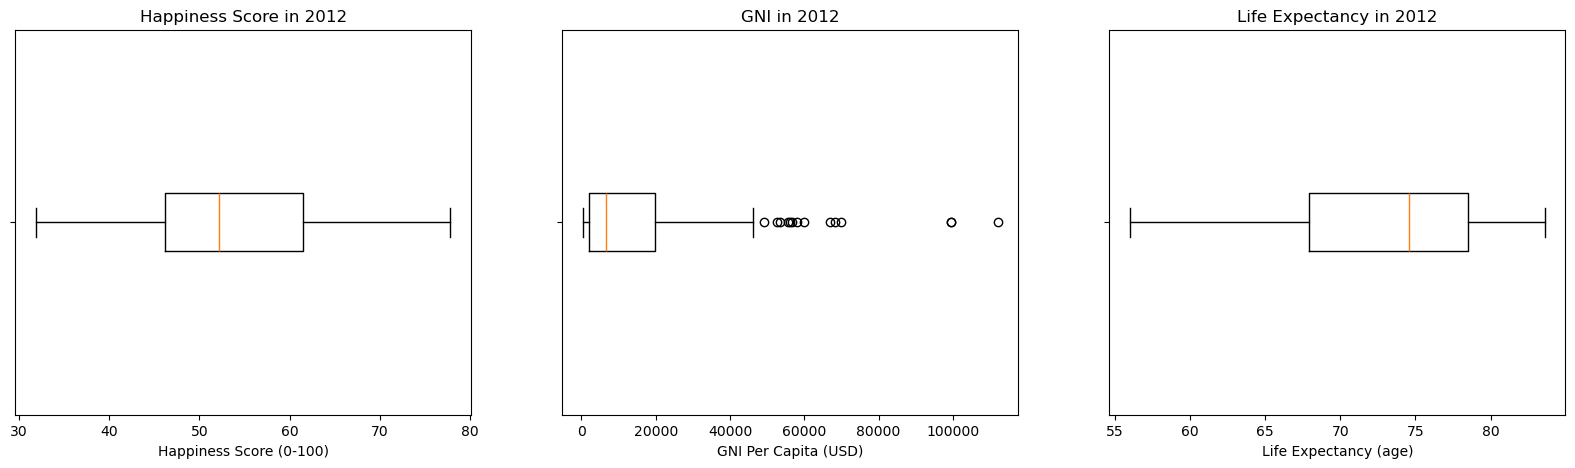

In [172]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].boxplot(merged_data["2012_happiness"], vert= False)
axes[0].set_title("Happiness Score in 2012")
axes[0].set_xlabel("Happiness Score (0-100)")
axes[0].set_yticklabels([])

axes[1].boxplot(merged_data["2012_gni"], vert= False)
axes[1].set_title("GNI in 2012")
axes[1].set_xlabel("GNI Per Capita (USD)")
axes[1].set_yticklabels([])

axes[2].boxplot(merged_data["2012_life"], vert= False)
axes[2].set_title("Life Expectancy in 2012");
axes[2].set_xlabel("Life Expectancy (age)")
axes[2].set_yticklabels([]);

Happiness Score: It appears to be somewhat normal with a very slight skew to the right. No outliers are present. <br> 
GNI: It is heavily skewed to the right meaning that there are a few countries that have very large GNI compared to the majority. There are several outliers.<br> 
Life Expectancy: It appears to have a slight skew to the left meaning that there are a few countries with lower life expectancies than the majority. No outliers are present.

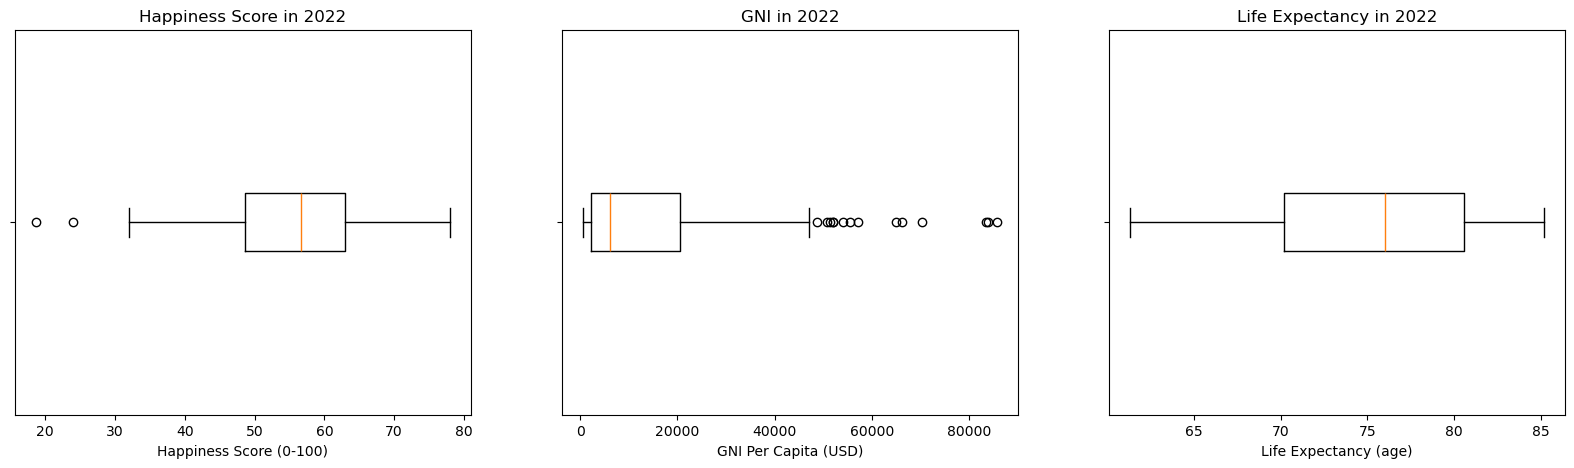

In [173]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].boxplot(merged_data["2022_happiness"], vert= False)
axes[0].set_title("Happiness Score in 2022")
axes[0].set_xlabel("Happiness Score (0-100)")
axes[0].set_yticklabels([])

axes[1].boxplot(merged_data["2022_gni"], vert= False)
axes[1].set_title("GNI in 2022")
axes[1].set_xlabel("GNI Per Capita (USD)")
axes[1].set_yticklabels([])

axes[2].boxplot(merged_data["2022_life"], vert= False)
axes[2].set_title("Life Expectancy in 2022");
axes[2].set_xlabel("Life Expectancy (age)")
axes[2].set_yticklabels([]);

Happiness Score: It appears to be skewed to the left meaning that there are a few countries with lower happiness scores than the majority. There are 2 outliers. <br> 
GNI: It is heavily skewed to the right meaning that there are a few countries that have very large GNI compared to the majority. There are several outliers.<br>
Life Expectancy: It appears to have a slight skew to the left meaning that there are a few countries with lower life expectancies than the majority. No outliers are present.

### Scatter Plots

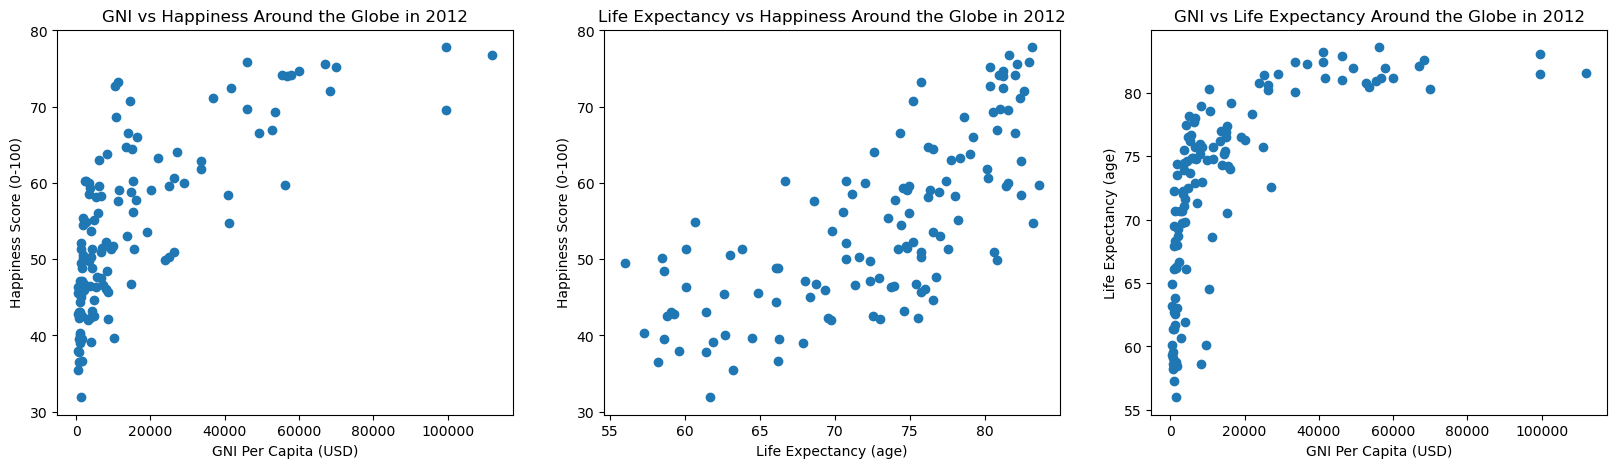

In [178]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].scatter(merged_data["2012_gni"], merged_data["2012_happiness"]);
axes[0].set_xlabel('GNI Per Capita (USD)')
axes[0].set_ylabel('Happiness Score (0-100)')
axes[0].set_title("GNI vs Happiness Around the Globe in 2012");

axes[1].scatter(merged_data["2012_life"], merged_data["2012_happiness"]);
axes[1].set_xlabel('Life Expectancy (age)')
axes[1].set_ylabel('Happiness Score (0-100)')
axes[1].set_title("Life Expectancy vs Happiness Around the Globe in 2012");

axes[2].scatter(merged_data["2012_gni"], merged_data["2012_life"]);
axes[2].set_xlabel('GNI Per Capita (USD)')
axes[2].set_ylabel('Life Expectancy (age)')
axes[2].set_title("GNI vs Life Expectancy Around the Globe in 2012");

There appears to be positive correlation for happiness vs life expectancy and happiness vs gni meaning that the higher the gni and life expectancy the higher the happiness score. There is also a positive correlation for gni vs life expectancy meaning the higher the gni, the higher the life expectancy.

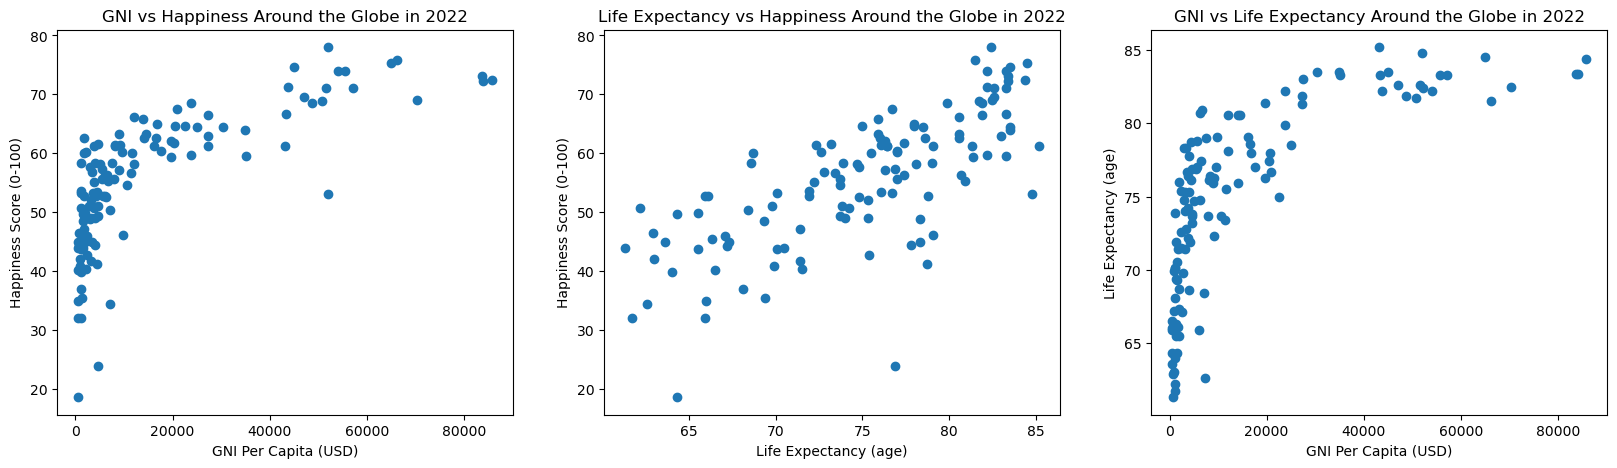

In [177]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].scatter(merged_data["2022_gni"], merged_data["2022_happiness"]);
axes[0].set_xlabel('GNI Per Capita (USD)')
axes[0].set_ylabel('Happiness Score (0-100)')
axes[0].set_title("GNI vs Happiness Around the Globe in 2022");

axes[1].scatter(merged_data["2022_life"], merged_data["2022_happiness"]);
axes[1].set_xlabel('Life Expectancy (age)')
axes[1].set_ylabel('Happiness Score (0-100)')
axes[1].set_title("Life Expectancy vs Happiness Around the Globe in 2022");

axes[2].scatter(merged_data["2022_gni"], merged_data["2022_life"]);
axes[2].set_xlabel('GNI Per Capita (USD)')
axes[2].set_ylabel('Life Expectancy (age)')
axes[2].set_title("GNI vs Life Expectancy Around the Globe in 2022");

There appears to be positive correlation for happiness vs life expectancy and happiness vs gni meaning that the higher the gni and life expectancy the higher the happiness score. There is also a slightly weaker positive correlation for gni vs life expectancy meaning the higher the gni, the higher the life expectancy.

### Additional Plots

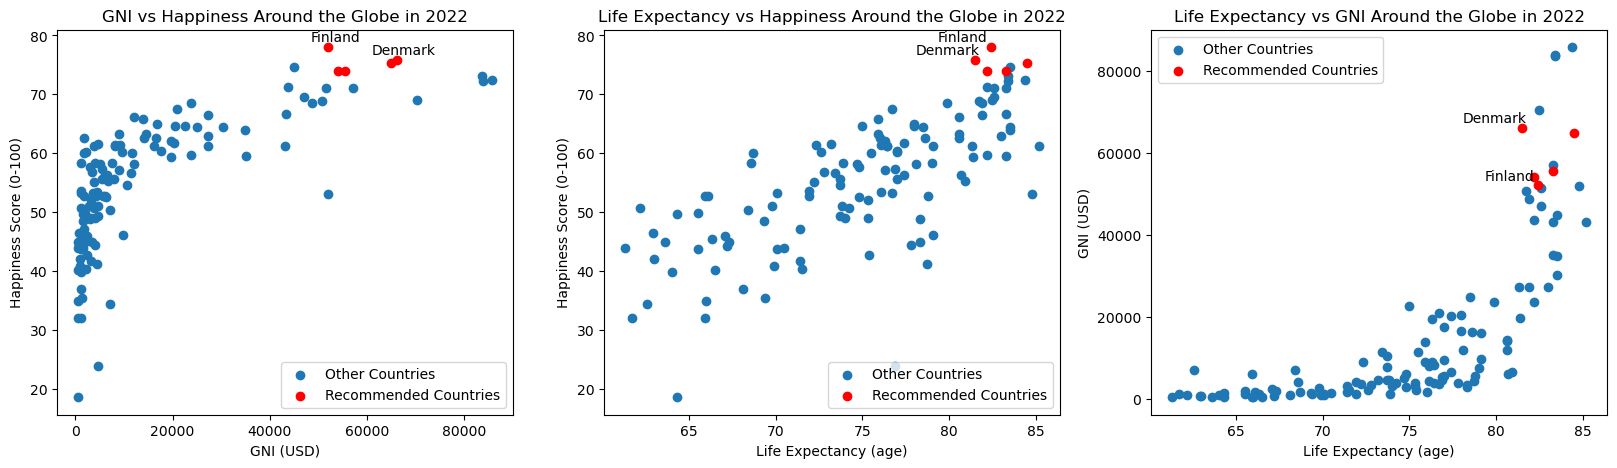

In [187]:
countries_to_label = ["Finland", 'Denmark']
highlight_countries = ['Finland', 'Denmark', 'Iceland', 'Sweden', 'Netherlands']
df_to_label = merged_data[merged_data['country'].isin(countries_to_label)]


highlight_df = merged_data[merged_data['country'].isin(highlight_countries)]
other_df = merged_data[~merged_data['country'].isin(highlight_countries)]

fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].scatter(other_df["2022_gni"], other_df["2022_happiness"], label='Other Countries')
axes[0].scatter(highlight_df["2022_gni"], highlight_df["2022_happiness"], color='red', label='Recommended Countries')
axes[0].set_xlabel('GNI (USD)')
axes[0].set_ylabel('Happiness Score (0-100)')
axes[0].legend(loc= 'lower right')
axes[0].set_title("GNI vs Happiness Around the Globe in 2022")

axes[1].scatter(other_df["2022_life"], other_df["2022_happiness"], label='Other Countries')
axes[1].scatter(highlight_df["2022_life"], highlight_df["2022_happiness"], color='red', label='Recommended Countries')
axes[1].set_xlabel('Life Expectancy (age)')
axes[1].set_ylabel('Happiness Score (0-100)')
axes[1].legend(loc= 'lower right')
axes[1].set_title("Life Expectancy vs Happiness Around the Globe in 2022")

axes[2].scatter(other_df["2022_life"], other_df["2022_gni"], label='Other Countries')
axes[2].scatter(highlight_df["2022_life"], highlight_df["2022_gni"], color='red', label='Recommended Countries')
axes[2].set_xlabel('Life Expectancy (age)')
axes[2].set_ylabel('GNI (USD)')
axes[2].legend()
axes[2].set_title("Life Expectancy vs GNI Around the Globe in 2022")

for index, row in df_to_label.iterrows():
    axes[0].annotate(row['country'], (row['2022_gni'], row['2022_happiness']), textcoords="offset points", xytext=(5,4), ha='center');
    axes[1].annotate(row['country'], (row['2022_life'], row['2022_happiness']), textcoords="offset points", xytext=(-20,4), ha='center');
    axes[2].annotate(row['country'], (row['2022_life'], row['2022_gni']), textcoords="offset points", xytext=(-20,4), ha='center');

These are the same plots from the scatter plot section, but I have marked my top 5 recommended countries for quality of life in red. I also labeled the plots of the top 2 countries (Finland and Denmark). I chose to label only 2 instead of all 5 so that the plot doesn't become too cluttered. 

In [188]:
# Top 10 countries in each category 
merf_happiness = merged_data.sort_values('2022_happiness', ascending= False).head(10)
merf_life = merged_data.sort_values('2022_life', ascending= False).head(10)
merf_happiness = merged_data.sort_values('2022_gni', ascending= False).head(10)

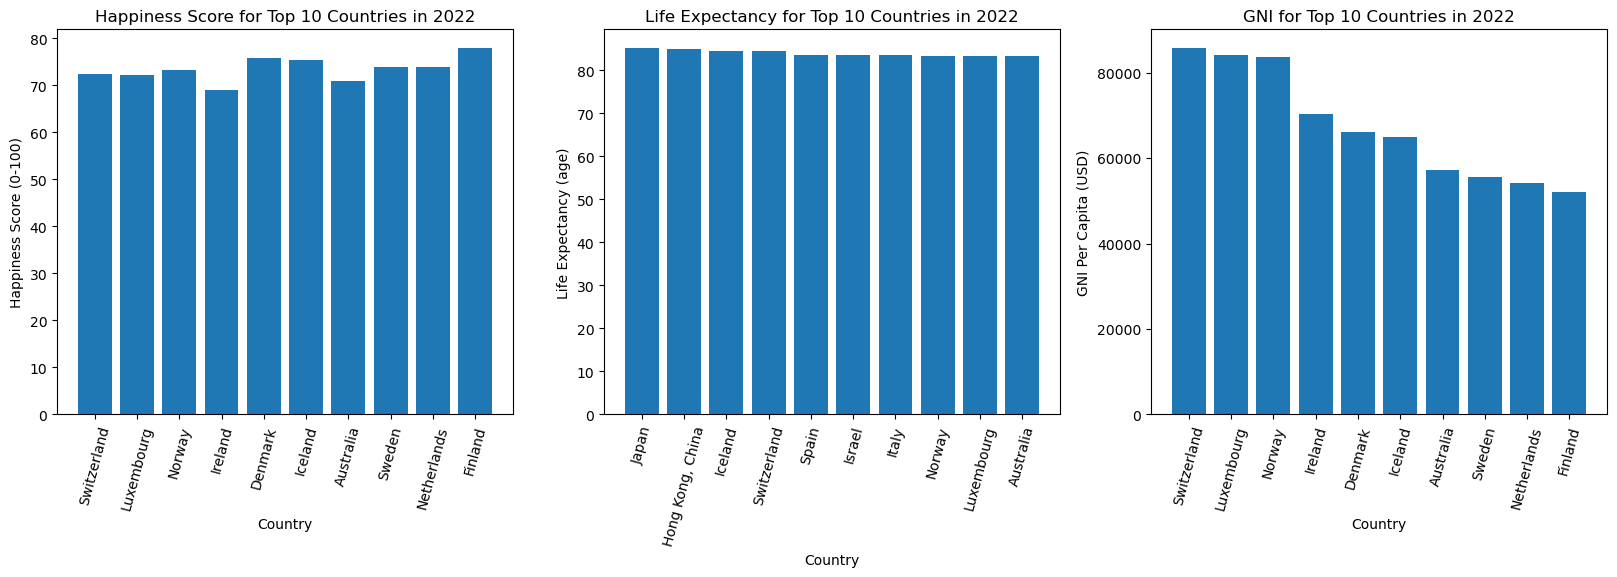

In [189]:
fig, axes = plt.subplots(1,3, figsize= (20, 5))

axes[0].bar(merf_happiness['country'], merf_happiness['2022_happiness'])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Happiness Score (0-100)')
axes[0].set_title("Happiness Score for Top 10 Countries in 2022")
axes[0].tick_params(rotation=75, axis= 'x');

axes[1].bar(merf_life['country'], merf_life['2022_life'])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life Expectancy (age)')
axes[1].set_title("Life Expectancy for Top 10 Countries in 2022")
axes[1].tick_params(rotation=75, axis= 'x');

axes[2].bar(merf_gni['country'], merf_gni['2022_gni'])
axes[2].set_xlabel('Country')
axes[2].set_ylabel('GNI Per Capita (USD)')
axes[2].set_title("GNI for Top 10 Countries in 2022")
axes[2].tick_params(rotation=75, axis= 'x');

Happiness Score: The top 10 countries for Happiness Score have little variablity in their scores. They range between 70 and 80. Majority of the countries are in the Scandinavian region. <br>
Life Expectancy: The top 10 countries for Life Expectancy have very little variablity in their ages. They are all slightly above 80. The countries are not isolated to a specific region and are located across various regions around the world. <br>
GNI: The top 10 countries for GNI have variablity in their income. They range between 50000 and 90000 per capita. Majority of the countries are in the Scandinavian region.

### Findings and Trends

- There is a positive correlation between happiness and GNI meaning the higher the GNI the higher the happiness score.
- There is a positive correlation between happiness and life expectancy meaning the higher the life expectancy the higher the happiness score.
- There is a positive correlation between life expectancy and GNI meaning the higher the GNI the higher the life expectancy.
- Several of the top ten countries in each category are nordic countries.
- The happiness scores appear to be skewed to the left meaning that there are a few countries with lower happiness scores than the majority.
- GNI is  heavily skewed to the right meaning that there are a few countries that have very large GNI compared to the majority. There are several outliers
- Life expectancy appears to have a slight skew to the left meaning that there are a few countries with lower life expectancies than the majorityt.

## Conclusions and Recommendations

There is a positive correlation for GNI, life expectancy and happiness; therfore, countries with high scores across all three categories will theoretically offer the best quality of life.  
Due to this, it is recommended that people should relocate to nordic countries if they are looking for a better quality of life. They were consistently found in the top 10 of each category and placed in the top 5 when looking at all categories combined. 
<br>Below are my top 5 recommended countries: <br>
1. Finland
2. Denmark
3. Iceland
4. Sweden
5. Netherlands

<br>Since the data only goes up to 2022, I recommend furthering the study to include more up to date information to provide the best recommendations. In further studies, I'd also recommend looking at other factors outside of GNI, life expectancy, and happiness to get a more holistic outlook.